<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:

In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('/data/workspace_files/train_kaggle_dls1.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# YOUR CODE

In [6]:
#vibo: вывод случайных строчек
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3083,49,99.40,5025,Female,0,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,0
1531,29,75.30,2263.4,Male,0,Yes,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),0
2379,47,58.60,2723.4,Female,0,Yes,No,Yes,No,DSL,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),0
5240,65,95.45,6223.3,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),0
3531,22,79.35,1730.35,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1
599,12,20.10,223.6,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
293,50,35.40,1748.9,Male,0,No,No,No,No phone service,DSL,Yes,No,No,Yes,No,No,One year,Yes,Mailed check,0
3018,1,25.05,25.05,Male,1,Yes,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,1
1023,19,20.25,383.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0
4187,34,90.15,3128.8,Male,1,Yes,No,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,No,One year,No,Mailed check,0


In [7]:
#vibo: проверка nan в датасете
data.isna().values.any()

False

In [8]:
#vibo: табличка с количеством nan в каждой колонке
data.isna().sum()

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [9]:
# YOUR CODE

In [10]:
#vibo: проверяем числовые признаки
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 123.9+ KB


In [11]:
#vibo: приводим столбец TotalSpent к float, приводим пустые str к nan
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'].replace(',','', regex=True), errors='coerce', downcast='float')

In [12]:
#vibo: проверяем столбец TotalSpent
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5273 non-null   float32
dtypes: float32(1), float64(1), int64(1)
memory usage: 103.3 KB


In [13]:
#vibo: вывод строк с nan столбца TotalSpent
data[data['TotalSpent'].isnull()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [14]:
#vibo: сортировка клиентов по ClientPeriod
data.sort_values('ClientPeriod', kind='mergesort')

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,72,84.10,5981.649902,Male,1,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),0
5261,72,99.90,7251.700195,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),0
5267,72,112.25,8041.649902,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
5268,72,117.50,8670.099609,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


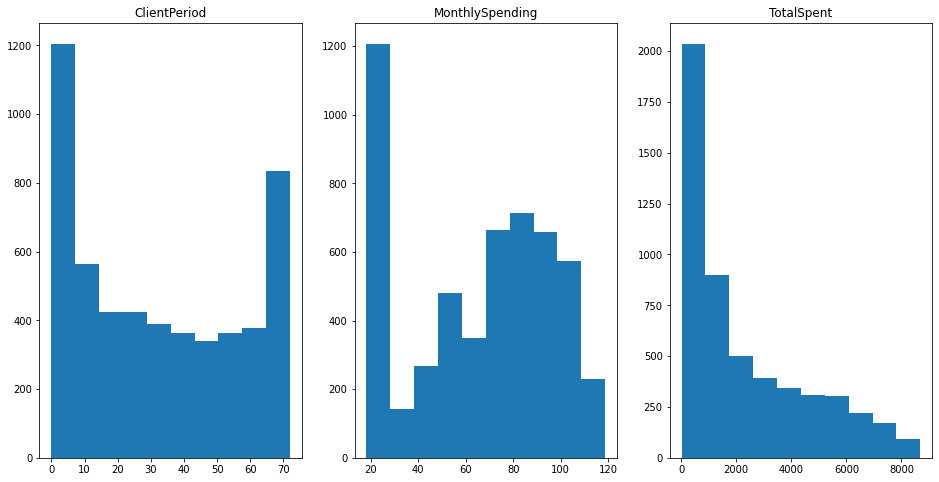

In [15]:
#vibo: строим гистограммы для числовых признаков
plt.figure(figsize=(16, 8))

plt.subplot(1,3,1)
plt.hist(data['ClientPeriod'].values)
plt.title('ClientPeriod')

plt.subplot(1,3,2)
plt.hist(data['MonthlySpending'].values)
plt.title('MonthlySpending')

plt.subplot(1,3,3)
plt.hist(data['TotalSpent'].values)
plt.title('TotalSpent')

In [16]:
#vibo: категориальные признаки
data[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sex                       5282 non-null   object
 1   IsSeniorCitizen           5282 non-null   int64 
 2   HasPartner                5282 non-null   object
 3   HasChild                  5282 non-null   object
 4   HasPhoneService           5282 non-null   object
 5   HasMultiplePhoneNumbers   5282 non-null   object
 6   HasInternetService        5282 non-null   object
 7   HasOnlineSecurityService  5282 non-null   object
 8   HasOnlineBackup           5282 non-null   object
 9   HasDeviceProtection       5282 non-null   object
 10  HasTechSupportAccess      5282 non-null   object
 11  HasOnlineTV               5282 non-null   object
 12  HasMovieSubscription      5282 non-null   object
 13  HasContractPhone          5282 non-null   object
 14  IsBillingPaperless      

In [17]:
#vibo: вывод случайных строчек для категориальных признаков
data[cat_cols].sample(10)

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
2769,Female,0,Yes,Yes,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Credit card (automatic)
3819,Male,0,No,No,No,No phone service,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic)
4010,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic)
2636,Male,0,No,No,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Bank transfer (automatic)
2151,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check
5117,Female,0,Yes,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic)
4281,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
707,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
4643,Male,0,Yes,No,Yes,Yes,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic)
2746,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check


In [18]:
#vibo: количество уникальных значений для каждого категориального признака
for col in cat_cols:
    print(f'CalName: {col}')
    print(data[col].value_counts())
    print()

CalName: Sex
Male      2655
Female    2627
Name: Sex, dtype: int64

CalName: IsSeniorCitizen
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

CalName: HasPartner
No     2705
Yes    2577
Name: HasPartner, dtype: int64

CalName: HasChild
No     3676
Yes    1606
Name: HasChild, dtype: int64

CalName: HasPhoneService
Yes    4761
No      521
Name: HasPhoneService, dtype: int64

CalName: HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

CalName: HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

CalName: HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

CalName: HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64

CalName: HasDeviceProtect

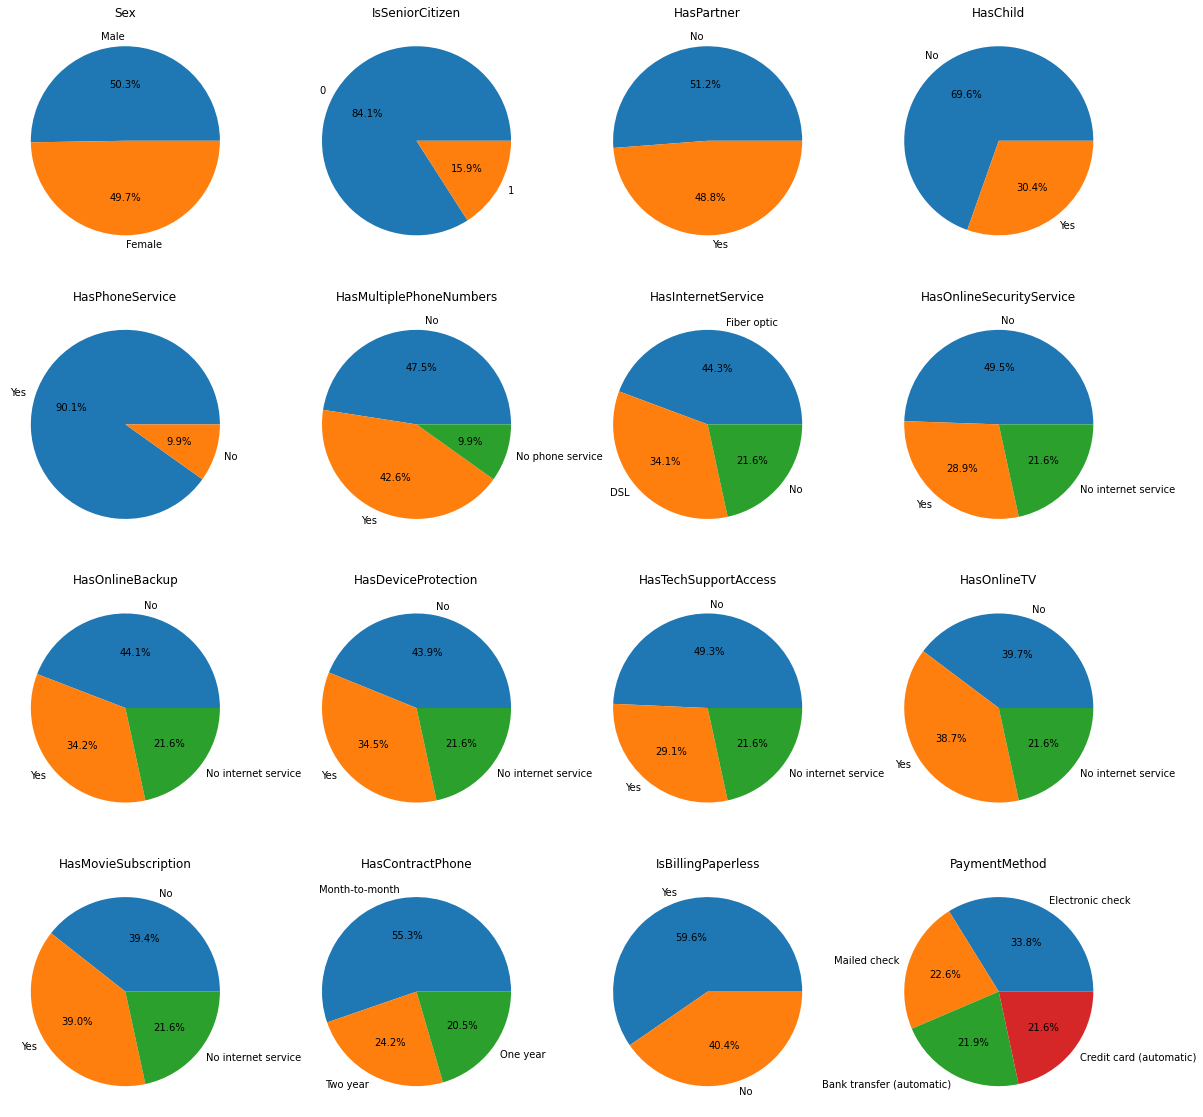

In [19]:
#vibo: для каждой колонки делаем круговые диаграммы
plt.figure(figsize=(20, 20))

plt.subplot(4,4,1)
plt.pie(data['Sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Sex')

plt.subplot(4,4,2)
plt.pie(data['IsSeniorCitizen'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
plt.title('IsSeniorCitizen')

plt.subplot(4,4,3)
plt.pie(data['HasPartner'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('HasPartner')

plt.subplot(4,4,4)
plt.pie(data['HasChild'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('HasChild')

plt.subplot(4,4,5)
plt.pie(data['HasPhoneService'].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('HasPhoneService')

plt.subplot(4,4,6)
plt.pie(data['HasMultiplePhoneNumbers'].value_counts(), labels=['No', 'Yes', 'No phone service'], autopct='%1.1f%%')
plt.title('HasMultiplePhoneNumbers')

plt.subplot(4,4,7)
plt.pie(data['HasInternetService'].value_counts(), labels=['Fiber optic', 'DSL', 'No'], autopct='%1.1f%%')
plt.title('HasInternetService')

plt.subplot(4,4,8)
plt.pie(data['HasOnlineSecurityService'].value_counts(), labels=['No', 'Yes', 'No internet service'], autopct='%1.1f%%')
plt.title('HasOnlineSecurityService')

plt.subplot(4,4,9)
plt.pie(data['HasOnlineBackup'].value_counts(), labels=['No', 'Yes', 'No internet service'], autopct='%1.1f%%')
plt.title('HasOnlineBackup')

plt.subplot(4,4,10)
plt.pie(data['HasDeviceProtection'].value_counts(), labels=['No', 'Yes', 'No internet service'], autopct='%1.1f%%')
plt.title('HasDeviceProtection')

plt.subplot(4,4,11)
plt.pie(data['HasTechSupportAccess'].value_counts(), labels=['No', 'Yes', 'No internet service'], autopct='%1.1f%%')
plt.title('HasTechSupportAccess')

plt.subplot(4,4,12)
plt.pie(data['HasOnlineTV'].value_counts(), labels=['No', 'Yes', 'No internet service'], autopct='%1.1f%%')
plt.title('HasOnlineTV')

plt.subplot(4,4,13)
plt.pie(data['HasMovieSubscription'].value_counts(), labels=['No', 'Yes', 'No internet service'], autopct='%1.1f%%')
plt.title('HasMovieSubscription')

plt.subplot(4,4,14)
plt.pie(data['HasContractPhone'].value_counts(), labels=['Month-to-month', 'Two year', 'One year'], autopct='%1.1f%%')
plt.title('HasContractPhone')

plt.subplot(4,4,15)
plt.pie(data['IsBillingPaperless'].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('IsBillingPaperless')

plt.subplot(4,4,16)
plt.pie(data['PaymentMethod'].value_counts(), labels=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], autopct='%1.1f%%')
plt.title('PaymentMethod');

In [20]:
#vibo: распределению целевой переменной, классы достаточно сбалансированы
data[target_col].value_counts()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [21]:
# YOUR CODE

In [22]:
#vibo: удаляем строки с nan (9 значений с TotalSpent = nan и ClientPeriod = 0)
data = data.dropna()

In [23]:
#vibo: размер датасета
data.shape

(5273, 20)

In [24]:
#vibo: таблица корреляции признаков
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
ClientPeriod,1.00,0.25,0.83,0.01,-0.35
MonthlySpending,0.25,1.00,0.65,0.22,0.18
TotalSpent,0.83,0.65,1.00,0.09,-0.20
IsSeniorCitizen,0.01,0.22,0.09,1.00,0.16
Churn,-0.35,0.18,-0.20,0.16,1.00


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [25]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [26]:
# YOUR CODE

In [27]:
#vibo: вещественные признаки
num_data = data[num_cols]
num_data

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.349976
1,72,25.85,1872.199951
2,1,75.90,75.900002
3,32,79.30,2570.000000
4,60,115.25,6758.450195
...,...,...,...
5277,3,30.40,82.150002
5278,50,44.45,2188.449951
5279,1,55.05,55.049999
5280,29,76.00,2215.250000


In [28]:
#vibo: категориальные признаки
cat_data = data[cat_cols]
cat_data

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [29]:
#vibo: кодируем категориальные признаки с помощью one-hot-encoding'а
dummy_features = pd.get_dummies(cat_data)
dummy_features

,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,1,1,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
5278,0,0,1,0,1,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
5279,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
5280,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [30]:
#vibo: объединяем вещественные и категориальные признаки
X = pd.concat([num_data, dummy_features], axis=1)
X

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.349976,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.199951,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.900002,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.000000,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.450195,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.150002,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5278,50,44.45,2188.449951,0,0,1,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0
5279,1,55.05,55.049999,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
5280,29,76.00,2215.250000,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [31]:
#vibo: целевая переменная
y = data['Churn']
y

In [32]:
#vibo: делим данные на train и valid
(X_train, X_valid, y_train, y_valid) = train_test_split(X, y, test_size=0.3, random_state=2)

In [33]:
#vibo: отмасштабируем вещественные признаки, задаем объект масштабирования
scaler = StandardScaler()

#vibo: обучаем объект масштабирования на train
scaler.fit(X_train, y_train)

#vibo: применяем отдельно к обучающей и валидационной выборке
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [34]:
#vibo: создаем модель
model_LRCV = LogisticRegressionCV(scoring='roc_auc', refit=True)
#vibo: обучаем модель на train
model_LRCV.fit(X_train_scaled, y_train)
#vibo: предсказания на train
y_train_predicted_LRCV = model_LRCV.predict_proba(X_train_scaled)[:, 1]
#vibo: предсказания на valid
y_valid_predicted_LRCV = model_LRCV.predict_proba(X_valid_scaled)[:, 1]
#vibo: ROC_AUC на train
train_auc_LRCV = roc_auc_score(y_train, y_train_predicted_LRCV)
#vibo: ROC_AUC на valid
valid_auc_LRCV = roc_auc_score(y_valid, y_valid_predicted_LRCV)

print('train_auc_LRCV = ', train_auc_LRCV)
print('valid_auc_LRCV =', valid_auc_LRCV)

train_auc_LRCV =  0.8433374553183266
valid_auc_LRCV = 0.8590690816267883


In [106]:
#vibo: лучший параметр С
model_LRCV.C_

Выпишите какое лучшее качество и с какими параметрами вам удалось получить
**valid_auc_LRCV = 0.8590690816267883**, **С = 2.782559402207126**

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [0]:
# YOUR CODE

In [36]:
#vibo: признаки
X = pd.concat([num_data, cat_data], axis=1)
X

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.349976,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.199951,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.900002,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.000000,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.450195,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.150002,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,50,44.45,2188.449951,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,1,55.05,55.049999,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,29,76.00,2215.250000,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [37]:
#vibo: целевая переменная
y = data['Churn']
y

In [38]:
#vibo: делим данные на train и valid
(X_train, X_valid, y_train, y_valid) = train_test_split(X, y, test_size=0.3, random_state=2)

In [40]:
import catboost

#vibo: создаем модель
model_CB = catboost.CatBoostClassifier(n_estimators=200, cat_features=cat_cols)
#vibo: обучаем модель на train
model_CB.fit(X_train, y_train)
#vibo: предсказания на train
y_train_predicted_CB = model_CB.predict_proba(X_train)[:, 1]
#vibo: ROC_AUC на valid
y_valid_predicted_CB = model_CB.predict_proba(X_valid)[:, 1]
#vibo: ROC_AUC на train
train_auc_CB = roc_auc_score(y_train, y_train_predicted_CB)
#vibo: ROC_AUC на valid
valid_auc_CB = roc_auc_score(y_valid, y_valid_predicted_CB)

print('train_auc_CB = ', train_auc_CB)
print('valid_auc_CB =', valid_auc_CB)

Learning rate set to 0.078715
0:	learn: 0.6409936	total: 67.2ms	remaining: 13.4s
1:	learn: 0.6010160	total: 90.5ms	remaining: 8.96s
2:	learn: 0.5719111	total: 109ms	remaining: 7.13s
3:	learn: 0.5424154	total: 136ms	remaining: 6.64s
4:	learn: 0.5205635	total: 151ms	remaining: 5.88s
5:	learn: 0.5072390	total: 159ms	remaining: 5.14s
6:	learn: 0.4919622	total: 184ms	remaining: 5.08s
7:	learn: 0.4779221	total: 201ms	remaining: 4.83s
8:	learn: 0.4680653	total: 216ms	remaining: 4.59s
9:	learn: 0.4609604	total: 230ms	remaining: 4.37s
10:	learn: 0.4542644	total: 250ms	remaining: 4.29s
11:	learn: 0.4460928	total: 268ms	remaining: 4.2s
12:	learn: 0.4403923	total: 277ms	remaining: 3.99s
13:	learn: 0.4361962	total: 281ms	remaining: 3.74s
14:	learn: 0.4313779	total: 293ms	remaining: 3.61s
15:	learn: 0.4276611	total: 302ms	remaining: 3.48s
16:	learn: 0.4247217	total: 309ms	remaining: 3.33s
17:	learn: 0.4221851	total: 319ms	remaining: 3.23s
18:	learn: 0.4212813	total: 322ms	remaining: 3.07s
19:	learn:

In [45]:
print('ИТОГО:')
print('LogisticRegressionCV:')
print('valid_auc_LRCV =', valid_auc_LRCV)
print('CatBoostClassifier:')
print('valid_auc_CB =', valid_auc_CB)

ИТОГО:
LogisticRegressionCV:
valid_auc_LRCV = 0.8590690816267883
CatBoostClassifier:
valid_auc_CB = 0.8537894117250687


Выпишите какое лучшее качество и с какими параметрами вам удалось получить **LogisticRegressionCV: valid_auc_LRCV = 0.8590690816267883**

# Предсказания

In [81]:
best_model = model_LRCV

In [82]:
X_test = pd.read_csv('/data/workspace_files/test_kaggle_dls1.csv')
submission = pd.read_csv('/data/workspace_files/submission_kaggle_dls1.csv')

In [83]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [84]:
#vibo: проверка nan в датасете
X_test.isna().values.any()

False

In [85]:
X_test[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     1761 non-null   int64  
 1   MonthlySpending  1761 non-null   float64
 2   TotalSpent       1761 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 41.4+ KB


In [86]:
#vibo: приводим столбец TotalSpent к float, приводим пустые str к nan
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'].replace(',','', regex=True), errors='coerce', downcast='float')

In [87]:
#vibo: проверяем столбец TotalSpent
X_test[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     1761 non-null   int64  
 1   MonthlySpending  1761 non-null   float64
 2   TotalSpent       1759 non-null   float32
dtypes: float32(1), float64(1), int64(1)
memory usage: 34.5 KB


In [88]:
#vibo: вывод строк с nan столбца TotalSpent
X_test[X_test['TotalSpent'].isnull()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,NaN,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [89]:
X_test[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sex                       1761 non-null   object
 1   IsSeniorCitizen           1761 non-null   int64 
 2   HasPartner                1761 non-null   object
 3   HasChild                  1761 non-null   object
 4   HasPhoneService           1761 non-null   object
 5   HasMultiplePhoneNumbers   1761 non-null   object
 6   HasInternetService        1761 non-null   object
 7   HasOnlineSecurityService  1761 non-null   object
 8   HasOnlineBackup           1761 non-null   object
 9   HasDeviceProtection       1761 non-null   object
 10  HasTechSupportAccess      1761 non-null   object
 11  HasOnlineTV               1761 non-null   object
 12  HasMovieSubscription      1761 non-null   object
 13  HasContractPhone          1761 non-null   object
 14  IsBillingPaperless      

In [90]:
#vibo: количество уникальных значений для каждого категориального признака
for col in cat_cols:
    print(f'CalName: {col}')
    print(X_test[col].value_counts())
    print()

CalName: Sex
Male      900
Female    861
Name: Sex, dtype: int64

CalName: IsSeniorCitizen
0    1461
1     300
Name: IsSeniorCitizen, dtype: int64

CalName: HasPartner
No     936
Yes    825
Name: HasPartner, dtype: int64

CalName: HasChild
No     1257
Yes     504
Name: HasChild, dtype: int64

CalName: HasPhoneService
Yes    1600
No      161
Name: HasPhoneService, dtype: int64

CalName: HasMultiplePhoneNumbers
No                  879
Yes                 721
No phone service    161
Name: HasMultiplePhoneNumbers, dtype: int64

CalName: HasInternetService
Fiber optic    755
DSL            621
No             385
Name: HasInternetService, dtype: int64

CalName: HasOnlineSecurityService
No                     886
Yes                    490
No internet service    385
Name: HasOnlineSecurityService, dtype: int64

CalName: HasOnlineBackup
No                     756
Yes                    620
No internet service    385
Name: HasOnlineBackup, dtype: int64

CalName: HasDeviceProtection
No          

In [92]:
X_test.shape

(1761, 19)

In [93]:
#vibo: заменяем nan на 0
X_test = X_test.fillna(0)

In [94]:
X_test.shape

(1761, 19)

In [95]:
#vibo: вещественные признаки
num_data = X_test[num_cols]
num_data

,ClientPeriod,MonthlySpending,TotalSpent
0,42,56.10,2386.850098
1,29,98.50,3004.149902
2,9,76.25,684.849976
3,67,74.00,4868.399902
4,71,20.10,1389.599976
...,...,...,...
1756,71,105.15,7555.000000
1757,13,20.85,272.350006
1758,2,91.45,171.449997
1759,19,89.10,1620.800049


In [96]:
#vibo: категориальные признаки
cat_data = X_test[cat_cols]
cat_data

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


In [97]:
#vibo: кодируем категориальные признаки с помощью one-hot-encoding'а
dummy_features = pd.get_dummies(cat_data)
dummy_features

,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,1,0,1,0,1,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
2,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,1,0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4,0,1,0,0,1,0,1,0,1,1,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,0,1,0,0,1,1,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
1757,0,1,0,0,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,1
1758,0,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1759,0,1,0,0,1,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0


In [98]:
#vibo: объединяем вещественные и категориальные признаки
X_test = pd.concat([num_data, dummy_features], axis=1)
X_test

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,42,56.10,2386.850098,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
1,29,98.50,3004.149902,1,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
2,9,76.25,684.849976,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,67,74.00,4868.399902,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
4,71,20.10,1389.599976,0,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555.000000,0,1,0,0,1,1,0,...,1,0,0,1,0,1,1,0,0,0
1757,13,20.85,272.350006,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
1758,2,91.45,171.449997,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1759,19,89.10,1620.800049,0,1,0,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0


In [99]:
#vibo: применяем scaller
X_test_scaled = scaler.transform(X_test)
X_test_scaled

In [101]:

submission['Churn'] = best_model.predict_proba(X_test_scaled)[:, 1]
submission.to_csv('my_submission.csv', index=None)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](attachment:./kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

vibo: **Kaggle Score 0.84759**